In [74]:
import pandas as pd
import numpy as np 

#visilation

import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
import seaborn as sns 

#models

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,mean_squared_error,classification_report,precision_score,recall_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


In [75]:
df=pd.read_csv("train.csv")
submission=pd.read_csv("test.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [77]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [78]:
df.drop(["Id","Fence","PoolQC","MiscFeature","Alley","MasVnrType"],axis=1,inplace=True)
submission.drop(["Fence","PoolQC","MiscFeature","Alley","MasVnrType"],axis=1,inplace=True)

Fazla bos deger olan sutunlari cikardim veri setimden

In [79]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
object_columns = df.select_dtypes(include="object")

In [80]:
for x in numeric_columns:
    df[x]=df[x].fillna(df[x].mean())

In [81]:
for x in object_columns:
    df[x].fillna("a",inplace=True)

hem numeric_columns hemde object_columns bos degerleri doldurdum

In [82]:
msSubClass=df["MSSubClass"].value_counts().sort_values(ascending=False)
msSubClass

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [83]:
fig=px.bar(
    df,
    x=msSubClass.index.astype(str),
    y=msSubClass.values,
    color=msSubClass.values,
    text=msSubClass.values,
    color_continuous_scale="YlOrBr"
)

fig.update_layout(
    template="plotly_dark"
)
fig.show()

In [84]:
def sumBath():
    fullBath=[]
    halfBath=[]
    BsmtFullBath=[]
    for x in df["FullBath"]:
        fullBath.append(x)
    for x in df["HalfBath"]:
        halfBath.append(x)
    for x in df["BsmtFullBath"]:
        BsmtFullBath.append(x)
    for x in range(1460):
        df.at[x,'sumBath']=halfBath[x]+fullBath[x]+ BsmtFullBath[x]
    
def sumBathsubmission():
    fullBath=[]
    halfBath=[]
    BsmtFullBath=[]
    for x in submission["FullBath"]:
        fullBath.append(x)
    for x in submission["HalfBath"]:
        halfBath.append(x)
    for x in submission["BsmtFullBath"]:
        BsmtFullBath.append(x)
    for x in range(1459):
        submission.at[x,'sumBath']=halfBath[x]+fullBath[x]+ BsmtFullBath[x]
def sumArea():
    TotalBsmtSF=[]
    GrLivArea=[]
    
    for x in df["TotalBsmtSF"]:
        TotalBsmtSF.append(x)
    for x in df["GrLivArea"]:
        GrLivArea.append(x)
    for x in range(1460):
        df.at[x,'sumArea']=TotalBsmtSF[x]+GrLivArea[x]
    
def sumAreaSubmission():
    TotalBsmtSF=[]
    GrLivArea=[]
    
    for x in submission["TotalBsmtSF"]:
        TotalBsmtSF.append(x)
    for x in submission["GrLivArea"]:
        GrLivArea.append(x)
    for x in range(1459):
        submission.at[x,'sumArea']=TotalBsmtSF[x]+GrLivArea[x]
    
    

In [85]:
sumBath()
sumBathsubmission()
sumArea()
sumAreaSubmission()
df=df.drop(["HalfBath","FullBath","BsmtFullBath"],axis=1)
submission=submission.drop(["HalfBath","FullBath","BsmtFullBath"],axis=1)


df[df["Electrical"].isnull()==True]
df.drop(1379,axis=0,inplace=True)


veride birlestirme yaptim ilk olarak banyolari ikinci olarak bos alanlari bir sutun yapip veri setime ekledim ve kullandigim sutunlari sildim 

In [86]:
GarageType=df.groupby("GarageType")["SalePrice"].mean().sort_values(ascending=False)
GarageYrBlt=df.groupby("GarageYrBlt")["SalePrice"].mean().sort_values(ascending=False)
GarageFinish=df.groupby("GarageFinish")["SalePrice"].mean().sort_values(ascending=False)
GarageCars=df.groupby("GarageCars")["SalePrice"].mean().sort_values(ascending=False)
GarageArea=df.groupby("GarageArea")["SalePrice"].mean().sort_values(ascending=False)

fig=make_subplots(rows=6,cols=2)
fig.add_trace(go.Bar(x=GarageType.index,name="GarageArea",y=GarageType.values,marker_color="white"),row=1,col=1)
fig.add_trace(go.Bar(x=GarageYrBlt.index.to_list(),name="GarageYrBlt",y=GarageYrBlt.values,marker_color="white"),row=1,col=2)
fig.add_trace(go.Bar(x=GarageFinish.index,name="GarageFinish",y=GarageFinish.values,marker_color="white"),row=4,col=1)
fig.add_trace(go.Bar(x=GarageCars.index,name="GarageCars",y=GarageCars.values,marker_color="white"),row=4,col=2)
fig.add_trace(go.Bar(x=GarageArea.index,name="GarageArea",y=GarageArea.values,marker_color="white"),row=6,col=1)

fig.update_layout(
    template="plotly_dark"
)
fig.show()

In [87]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])


In [88]:
aykiriDegerler=[]
def find_outliers_IQR(df):
    for x in numeric_columns:
        q1=df[x].quantile(0.25)
        q3=df[x].quantile(0.75)
        IQR=q3-q1
        outliers = df[((df[x]<(q1-1.5*IQR)) | (df[x]>(q3+1.5*IQR)))].index.tolist()
        aykiriDegerler.append({"columns":x,"aykiriDeger":outliers})
    
   
    return aykiriDegerler

In [89]:
aykiriDegerList=find_outliers_IQR(df)

In [90]:
for item in aykiriDegerList:
    column_name = item["columns"]
    outliers = item["aykiriDeger"]
    print(f"Sütun: {column_name}")
    print(f"Aykırı Değerler: {outliers}")


Sütun: MSSubClass
Aykırı Değerler: [9, 48, 56, 75, 87, 93, 115, 125, 145, 165, 172, 180, 193, 195, 225, 227, 232, 235, 243, 246, 285, 291, 300, 312, 335, 344, 348, 363, 411, 430, 432, 434, 472, 488, 489, 490, 500, 504, 520, 535, 578, 599, 603, 614, 623, 635, 637, 649, 655, 675, 685, 687, 703, 705, 713, 755, 758, 829, 831, 837, 861, 914, 915, 956, 959, 962, 969, 971, 975, 985, 1007, 1029, 1030, 1038, 1039, 1062, 1068, 1086, 1088, 1091, 1104, 1144, 1160, 1172, 1186, 1190, 1191, 1219, 1236, 1265, 1266, 1291, 1297, 1304, 1334, 1358, 1364, 1367, 1378, 1393, 1416, 1449, 1452]
Sütun: LotFrontage
Aykırı Değerler: [25, 35, 36, 41, 52, 56, 75, 85, 86, 145, 150, 159, 161, 171, 193, 195, 197, 225, 227, 231, 232, 235, 260, 264, 276, 277, 290, 302, 306, 313, 320, 363, 408, 429, 430, 432, 434, 446, 473, 489, 500, 504, 523, 599, 603, 614, 649, 655, 662, 673, 675, 758, 764, 774, 807, 825, 829, 831, 837, 889, 906, 909, 914, 915, 934, 956, 959, 962, 963, 966, 991, 1007, 1010, 1029, 1038, 1039, 1061, 1088

Aykiri degerleri bulup listeledim

In [91]:
fig=make_subplots(rows=3,cols=3)

fig.add_trace(go.Box(y=df["MSSubClass"].values , name= "MSSubClass", marker_color="white"),row=1,col=1)
fig.add_trace(go.Box(y=df["LotFrontage"].values , name= "LotFrontage", marker_color="white"),row=1,col=2)
fig.add_trace(go.Box(y=df["LotArea"].values , name= "LotArea", marker_color="white"),row=1,col=3)
fig.add_trace(go.Box(y=df["OverallQual"].values , name= "OverallQual", marker_color="white"),row=2,col=1)
fig.add_trace(go.Box(y=df["OverallCond"].values , name= "OverallCond", marker_color="white"),row=2,col=2)
fig.add_trace(go.Box(y=df["YearBuilt"].values , name= "YearBuilt", marker_color="white"),row=2,col=3)
fig.add_trace(go.Box(y=df["MasVnrArea"].values , name= "MasVnrArea", marker_color="white"),row=3,col=1)
fig.add_trace(go.Box(y=df["BsmtFinSF1"].values , name= "BsmtFinSF1", marker_color="white"),row=3,col=2)
fig.add_trace(go.Box(y=df["BsmtFinSF2"].values , name= "BsmtFinSF2", marker_color="white"),row=3,col=3)

fig.update_layout(
    title="Aykiri degerlerin Box tablosu ",
    template="plotly_dark"
)
fig.show()






In [92]:
fig=make_subplots(rows=3,cols=3)

fig.add_trace(go.Box(y=df["BsmtUnfSF"].values , name= "BsmtUnfSF", marker_color="white"),row=1,col=1)
fig.add_trace(go.Box(y=df["TotalBsmtSF"].values , name= "TotalBsmtSF", marker_color="white"),row=1,col=2)
fig.add_trace(go.Box(y=df["1stFlrSF"].values , name= "1stFlrSF", marker_color="white"),row=1,col=3)
fig.add_trace(go.Box(y=df["2ndFlrSF"].values , name= "2ndFlrSF", marker_color="white"),row=2,col=1)
fig.add_trace(go.Box(y=df["LowQualFinSF"].values , name= "LowQualFinSF", marker_color="white"),row=2,col=2)
fig.add_trace(go.Box(y=df["PoolArea"].values , name= "PoolArea", marker_color="white"),row=2,col=3)
fig.add_trace(go.Box(y=df["GrLivArea"].values , name= "GrLivArea", marker_color="white"),row=3,col=1)
fig.add_trace(go.Box(y=df["BedroomAbvGr"].values , name= "BedroomAbvGr", marker_color="white"),row=3,col=2)
fig.add_trace(go.Box(y=df["SalePrice"].values , name= "SalePrice", marker_color="white"),row=3,col=3)

fig.update_layout(
    title="Aykiri degerlerin Box tablosu ",
    template="plotly_dark"
)
fig.show()







In [93]:
MSSubClass=df["MSSubClass"].value_counts()
LotFrontage=df["LotFrontage"].value_counts()
LotArea=df["LotArea"].value_counts()
OverallQual=df["OverallQual"].value_counts()
OverallCond=df["OverallCond"].value_counts()
YearBuilt=df["YearBuilt"].value_counts()
MasVnrArea=df["MasVnrArea"].value_counts()
BsmtFinSF1=df["BsmtFinSF1"].value_counts()
BsmtFinSF2=df["BsmtFinSF2"].value_counts()

In [94]:
fig=make_subplots(rows=3,cols=3)

fig.add_trace(go.Bar(x=MSSubClass.index,y=MSSubClass.values , name= "MSSubClass", marker_color="white"),row=1,col=1)
fig.add_trace(go.Histogram(x=LotFrontage.index,y=LotFrontage.values, name= "LotFrontage", marker_color="white"),row=1,col=2)
fig.add_trace(go.Histogram(x=LotArea.index,y=LotArea.values , name= "LotArea", marker_color="white"),row=1,col=3)
fig.add_trace(go.Bar(x=OverallQual.index,y=OverallQual.values , name= "OverallQual", marker_color="white"),row=2,col=1)
fig.add_trace(go.Bar(x=OverallCond.index,y=OverallCond.values , name= "OverallCond", marker_color="white"),row=2,col=2)
fig.add_trace(go.Bar(x=YearBuilt.index,y=YearBuilt.values, name= "YearBuilt", marker_color="white"),row=2,col=3)
fig.add_trace(go.Histogram(x=MasVnrArea.index,y=MasVnrArea.values , name= "MasVnrArea", marker_color="white"),row=3,col=1)
fig.add_trace(go.Histogram(x=BsmtFinSF1.index,y=BsmtFinSF1.values, name= "BsmtFinSF1", marker_color="white"),row=3,col=2)
fig.add_trace(go.Histogram(x=BsmtFinSF2.index,y=BsmtFinSF2.values , name= "BsmtFinSF2", marker_color="white"),row=3,col=3)

fig.update_layout(
    title="Aykiri degerlerin Bar tablosu ",
    template="plotly_dark"
)
fig.show()

In [95]:

BsmtUnfSF=df["BsmtUnfSF"].value_counts()
TotalBsmtSF=df["TotalBsmtSF"].value_counts()
FirstFlrSF=df["1stFlrSF"].value_counts()
secondFlrSF=df["2ndFlrSF"].value_counts()
LowQualFinSF=df["LowQualFinSF"].value_counts()
PoolArea=df["PoolArea"].value_counts()
GrLivArea=df["GrLivArea"].value_counts()
BedroomAbvGr=df["BedroomAbvGr"].value_counts()
SalePrice=df["SalePrice"].value_counts()


In [96]:
fig=make_subplots(rows=3,cols=3)

fig.add_trace(go.Histogram(x=BsmtUnfSF.index,y=BsmtUnfSF.values , name= "BsmtUnfSF", marker_color="white"),row=1,col=1)
fig.add_trace(go.Histogram(x=TotalBsmtSF.index,y=TotalBsmtSF.values, name= "TotalBsmtSF", marker_color="white"),row=1,col=2)
fig.add_trace(go.Bar(x=FirstFlrSF.index,y=FirstFlrSF.values , name= "1stFlrSF", marker_color="white"),row=1,col=3)
fig.add_trace(go.Histogram(x=secondFlrSF.index,y=secondFlrSF.values , name= "2ndFlrSF", marker_color="white"),row=2,col=1)
fig.add_trace(go.Histogram(x=LowQualFinSF.index,y=LowQualFinSF.values , name= "LowQualFinSF", marker_color="white"),row=2,col=2)
fig.add_trace(go.Histogram(x=PoolArea.index,y=PoolArea.values, name= "PoolArea", marker_color="white"),row=2,col=3)
fig.add_trace(go.Histogram(x=GrLivArea.index,y=GrLivArea.values , name= "GrLivArea", marker_color="white"),row=3,col=1)
fig.add_trace(go.Histogram(x=BedroomAbvGr.index,y=BedroomAbvGr.values, name= "BedroomAbvGr", marker_color="white"),row=3,col=2)
fig.add_trace(go.Histogram(x=SalePrice.index,y=SalePrice.values , name= "SalePrice", marker_color="white"),row=3,col=3)

fig.update_layout(
    title="Aykiri degerlerin Bar tablosu ",
    template="plotly_dark"
)
fig.show()

In [97]:
df.drop([322,934,1268,185,304,523],axis=0,inplace=True)


aykiri degerlere gore bu satirlari cikarmayi uygun gordum

In [98]:
df=df.drop(["GrLivArea","TotalBsmtSF","1stFlrSF","2ndFlrSF"],axis=1)
submission=submission.drop(["GrLivArea","TotalBsmtSF","1stFlrSF","2ndFlrSF"],axis=1)
numeric_columns = df.select_dtypes(include=['int64', 'float64'])



<Axes: >

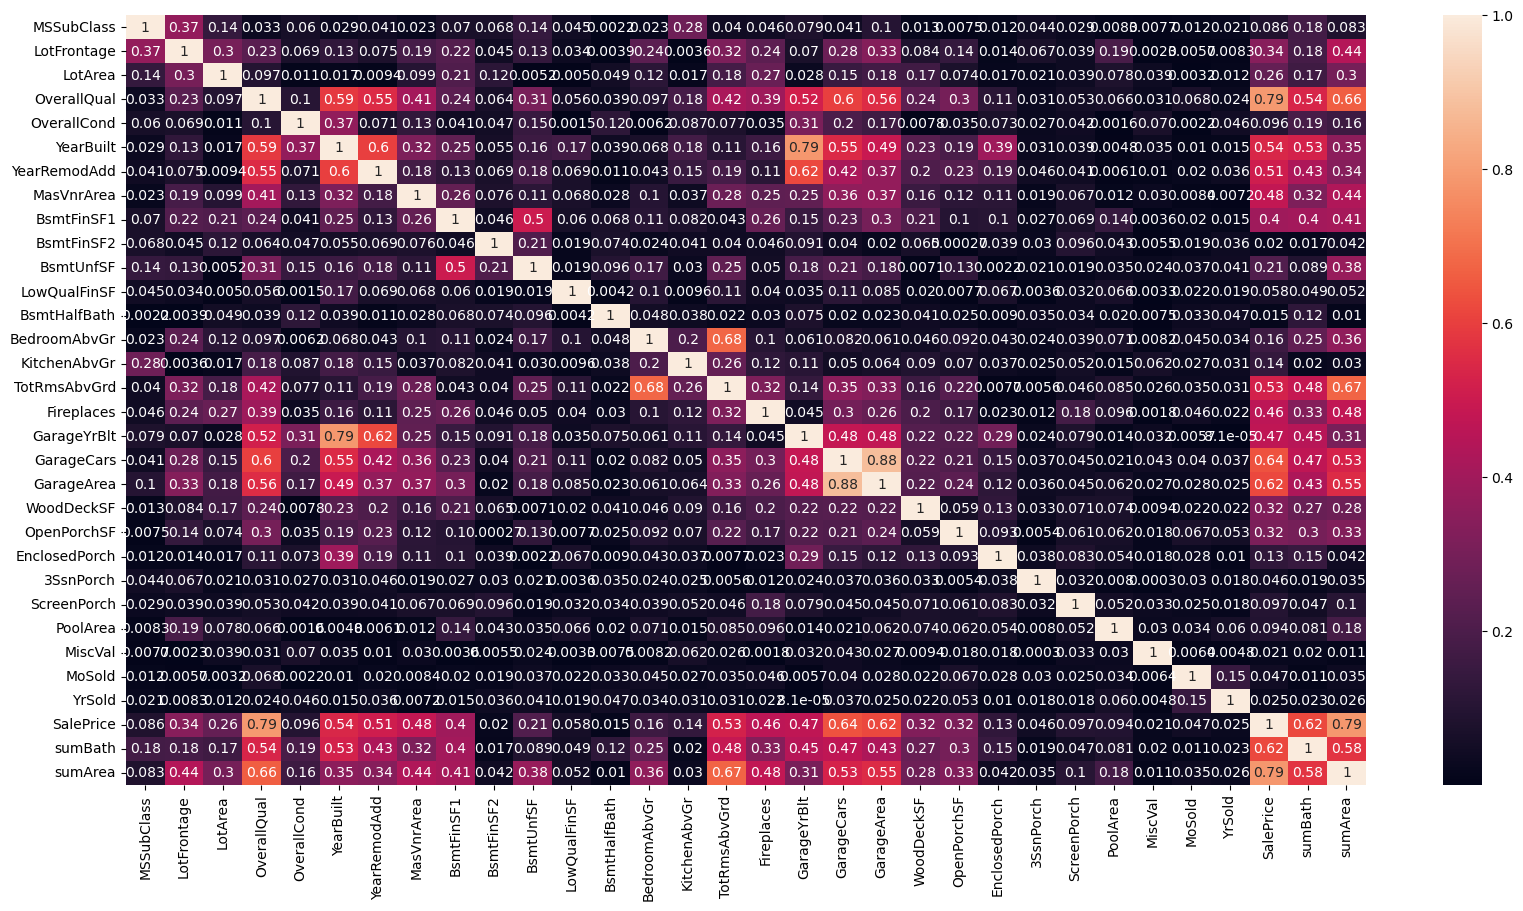

In [99]:
plt.figure(figsize=(20, 10))
sns.heatmap(numeric_columns.corr().abs(),  annot=True)

In [100]:
df["MasVnrArea"].value_counts()

MasVnrArea
0.000000      857
72.000000       8
108.000000      8
180.000000      8
103.685262      8
             ... 
261.000000      1
748.000000      1
259.000000      1
209.000000      1
119.000000      1
Name: count, Length: 326, dtype: int64

In [101]:
#df.drop(["MasVnrArea","MSSubClass","OverallCond","BsmtFinSF2","LowQualFinSF","BsmtHalfBath","3SsnPorch","PoolArea","MiscVal","MoSold","YrSold"],axis=1,inplace=True)
#submission.drop(["MasVnrArea","MSSubClass","OverallCond","BsmtFinSF2","LowQualFinSF","BsmtHalfBath","3SsnPorch","PoolArea","MiscVal","MoSold","YrSold"],axis=1,inplace=True)

LotArea,LotFrontage,OverrallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,BedroomAbvGr,kitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,sumBath,sumArea sutunlarini alicam modellerimde ve object columslar var 

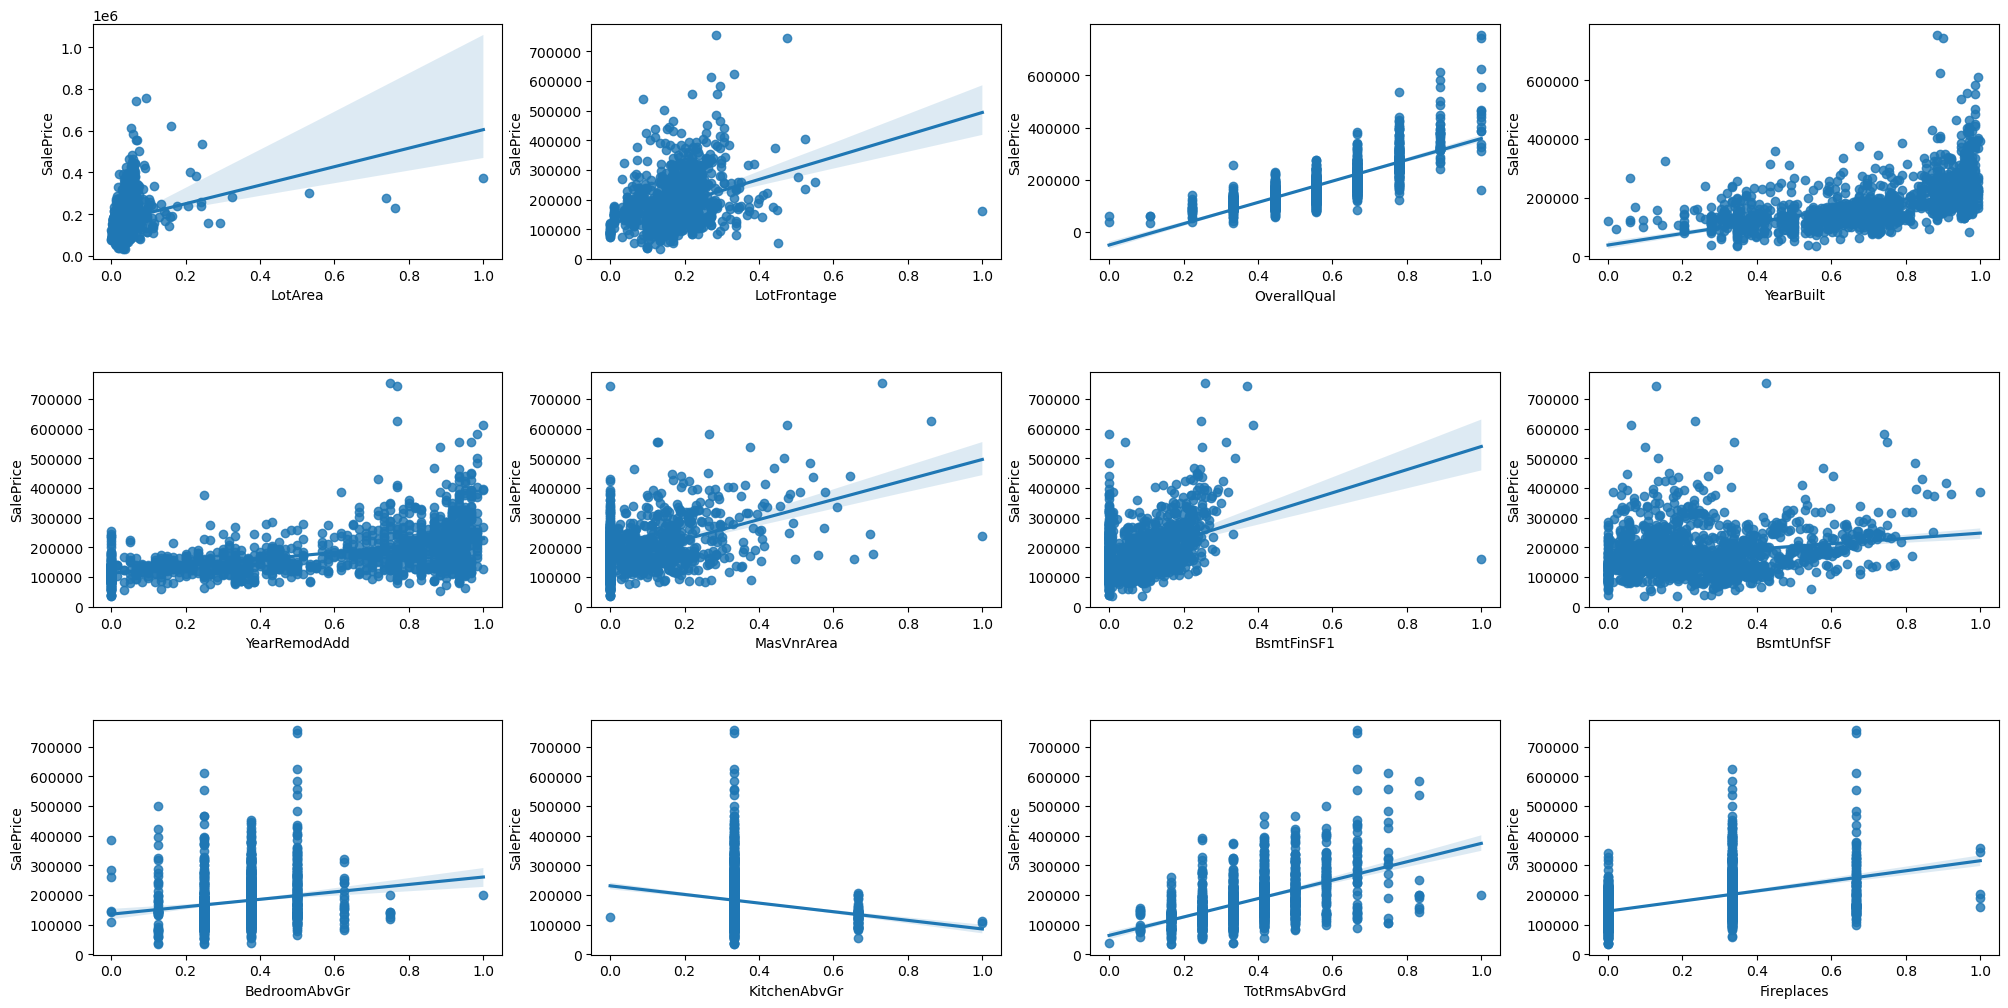

In [102]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ["LotArea","LotFrontage","OverallQual","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtUnfSF","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces"]
x = df.loc[:,column_sels]
y = df['SalePrice']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


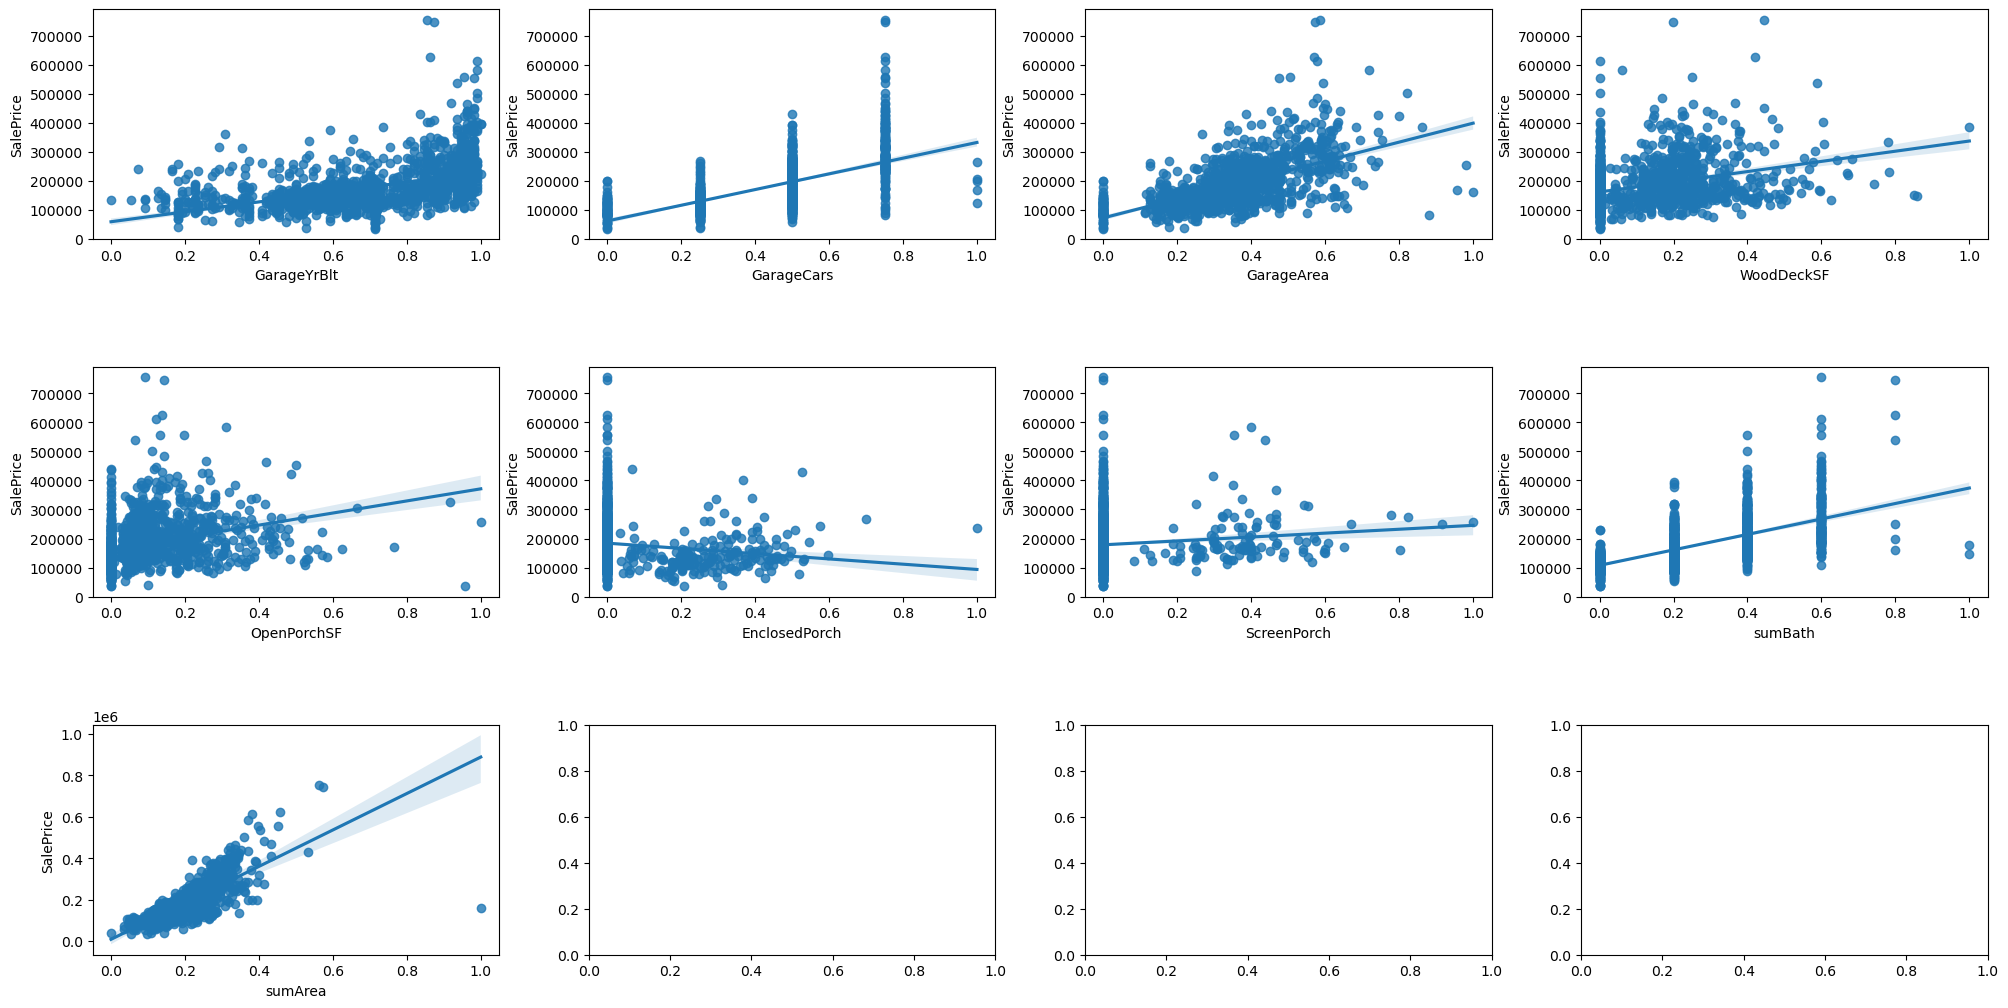

In [103]:
min_max_scaler = preprocessing.MinMaxScaler()
column_sels=["GarageYrBlt","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","ScreenPorch","sumBath","sumArea" ]
x = df.loc[:,column_sels]
y = df['SalePrice']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


Kullanacagim sutunlari MinMaxScaler algoritmasi cagirdim

In [104]:
dfNew=df
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
for col in numeric_columns:
    if np.abs(dfNew[col].skew()) > 0.3:
        dfNew[col] = np.log1p(dfNew[col])


In [105]:
object_columns = df.select_dtypes(include="object")
cevir=LabelEncoder()
for x in object_columns:
    dfNew[x]=cevir.fit_transform(dfNew[x])
for x in object_columns:
    submission[x]=cevir.fit_transform(submission[x])


verimi duzenledim

In [106]:
dfNew

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,sumBath,sumArea
0,4.110874,3,4.189655,9.042040,1,3,3,0,4,0,...,0.0,0.0,0.000000,2,2008,8,4,12.247699,4.0,7.850493
1,3.044522,3,4.394449,9.169623,1,3,3,0,2,0,...,0.0,0.0,0.000000,5,2007,8,4,12.109016,2.0,7.833996
2,4.110874,3,4.234107,9.328212,1,0,3,0,4,0,...,0.0,0.0,0.000000,9,2008,8,4,12.317171,4.0,7.903596
3,4.262680,3,4.110874,9.164401,1,0,3,0,0,0,...,0.0,0.0,0.000000,2,2006,8,0,11.849405,2.0,7.813592
4,4.110874,3,4.442651,9.565284,1,0,3,0,2,0,...,0.0,0.0,0.000000,12,2008,8,4,12.429220,4.0,8.114923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,3,4.143135,8.976894,1,3,3,0,4,0,...,0.0,0.0,0.000000,8,2007,8,4,12.072547,3.0,7.863651
1456,3.044522,3,4.454347,9.486152,1,3,3,0,4,0,...,0.0,0.0,0.000000,2,2010,8,4,12.254868,3.0,8.193124
1457,4.262680,3,4.204693,9.109746,1,3,3,0,4,0,...,0.0,0.0,7.824446,5,2010,8,4,12.493133,2.0,8.158516
1458,3.044522,3,4.234107,9.181735,1,3,3,0,4,0,...,0.0,0.0,0.000000,4,2010,8,4,11.864469,2.0,7.676474


In [107]:
train=df.drop("SalePrice",axis=1)
test=df.loc[:,"SalePrice"]

In [108]:
trainx, testx, trainy, testy = train_test_split(train, test, test_size=0.2, random_state=156)

In [109]:
trainx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 272 to 720
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1162 non-null   float64
 1   MSZoning       1162 non-null   int64  
 2   LotFrontage    1162 non-null   float64
 3   LotArea        1162 non-null   float64
 4   Street         1162 non-null   int64  
 5   LotShape       1162 non-null   int64  
 6   LandContour    1162 non-null   int64  
 7   Utilities      1162 non-null   int64  
 8   LotConfig      1162 non-null   int64  
 9   LandSlope      1162 non-null   int64  
 10  Neighborhood   1162 non-null   int64  
 11  Condition1     1162 non-null   int64  
 12  Condition2     1162 non-null   int64  
 13  BldgType       1162 non-null   int64  
 14  HouseStyle     1162 non-null   int64  
 15  OverallQual    1162 non-null   int64  
 16  OverallCond    1162 non-null   float64
 17  YearBuilt      1162 non-null   float64
 18  YearRemodAdd

In [110]:
linearRegression=LinearRegression()
linearRegression.fit(trainx,trainy)
predictRegression=linearRegression.predict(testx)
dogrulukOrani=np.sqrt(mean_squared_error(predictRegression,testy))
dogrulukOrani

0.11698133819090009

In [111]:
ridge=Ridge()
grid_model = GridSearchCV(ridge, param_grid={'alpha':[0.05, 0.1, 1,2,3,4, 5, 8, 10, 12, 15, 20]}, scoring='neg_mean_squared_error', cv=5)
grid_model.fit(trainx,trainy)

best_ridge = grid_model.best_estimator_
print(best_ridge)


Ridge(alpha=0.05)


In [112]:
ridge=Ridge(alpha=4)
ridge.fit(trainx,trainy)
predictRidge=ridge.predict(testx)
dogrulukOraniRidge=np.sqrt(mean_squared_error(testy,predictRidge))
dogrulukOraniRidge

0.11968956368794714

In [113]:
gripRidgepredict=grid_model.predict(testx)
np.sqrt(mean_squared_error(testy,gripRidgepredict))

0.11849473164109506

In [114]:
agac=RandomForestRegressor(random_state=42)

grid_modelAgac = GridSearchCV(agac, param_grid={'n_estimators':[1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]}, scoring='neg_mean_squared_error', cv=5)
grid_modelAgac.fit(trainx,trainy)
best_estimator = grid_modelAgac.best_estimator_
print(best_estimator)

RandomForestRegressor(n_estimators=85, random_state=42)


In [115]:
agac=RandomForestRegressor(n_estimators=85,random_state=42)
agac.fit(trainx,trainy)
predictAgac=agac.predict(testx)
dogrulukOraniAgac=np.sqrt(mean_squared_error(testy,predictAgac))
gridpredictAgac=np.round(grid_modelAgac.predict(testx))
np.sqrt(mean_squared_error(testy,gridpredictAgac))

0.3012316142526588

In [116]:
dogrulukOraniAgac

0.14081634585337863

In [117]:
Knregression=KNeighborsRegressor()
Knregression.fit(trainx,trainy)
predictKNregression=Knregression.predict(testx)
dogrulukOraniKnregression=np.sqrt(mean_squared_error(testy,predictKNregression))
dogrulukOraniKnregression

0.26876281272449914

In [118]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe=Pipeline([
    ("scale",StandardScaler()),
    ("model",KNeighborsRegressor(n_neighbors=2))
])

pipe.fit(trainx,trainy)
predictKNregression=np.round(pipe.predict(testx))
dogrulukOraniKnregression=np.sqrt(mean_squared_error(testy,predictKNregression))

In [119]:
gripKNpredict=grid_model.predict(testx)
np.sqrt(mean_squared_error(testy,gripKNpredict))

0.11849473164109506

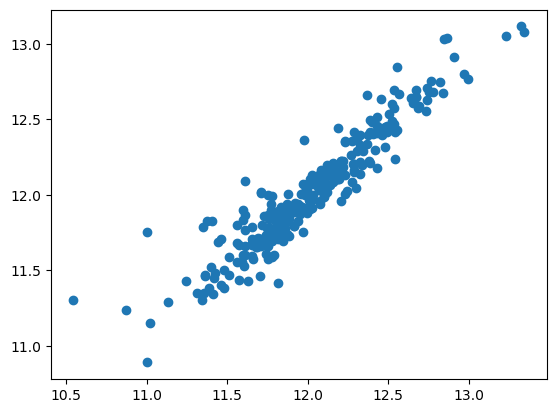

In [120]:
plt.scatter(testy,predictAgac)

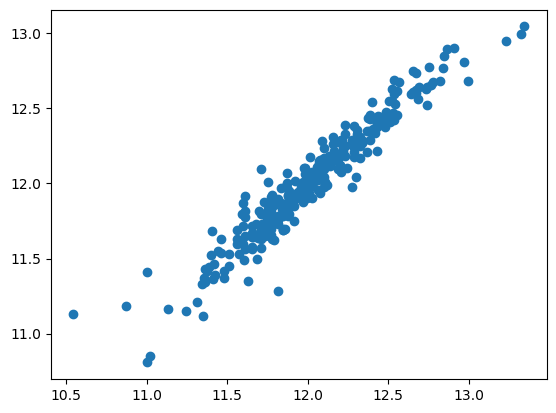

In [121]:
plt.scatter(testy,predictRegression)

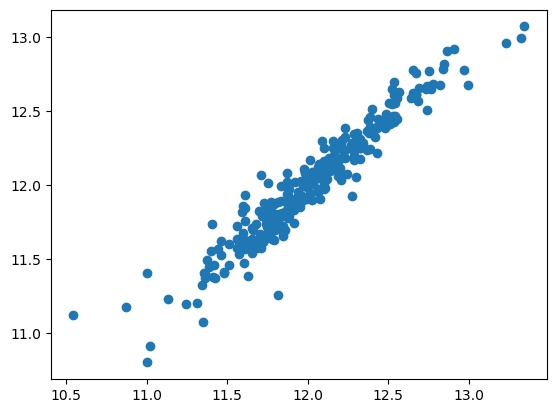

In [122]:
plt.scatter(testy,predictRidge)

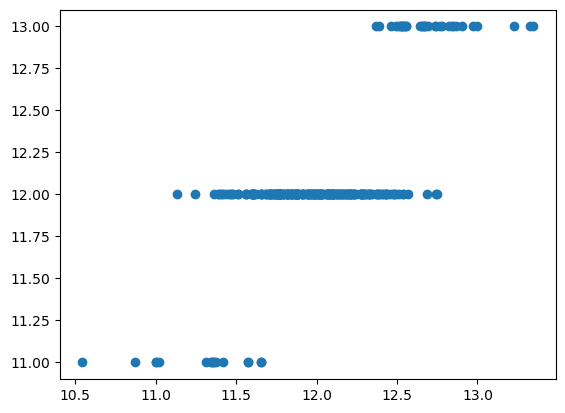

In [123]:
plt.scatter(testy,predictKNregression)

In [124]:
Id=submission["Id"]
submission.drop("Id",axis=1,inplace=True)


In [125]:
numeric_columnsSubmission=submission.select_dtypes(include=['int64', 'float64'])
for x in numeric_columnsSubmission:
    submission[x]=submission[x].fillna(submission[x].mean())
for x in object_columns:
    submission[x].fillna("a",inplace=True)

In [126]:
predict2=linearRegression.predict(submission)

In [127]:
sample_submission2=pd.DataFrame({"Id":Id,"SalePrice":predict2})
sample_submission2

,Id,SalePrice
0,1461,8483.701262
1,1462,9017.284032
2,1463,9136.238759
3,1464,8820.504157
4,1465,8410.857163
...,...,...
1454,2915,7681.527530
1455,2916,7684.319976
1456,2917,9499.490961
1457,2918,8539.062151


In [128]:
sample_submission2.to_csv('submission2.csv', index=False)